# Groundstate configurations and scaling fits — annotated
This notebook merges lattice configuration visualizations (Configs 1–4) with scaling plots and curve fits. Use it to:

- Visualize polymer chains and rings on an 8×8 lattice with periodic boundaries.
- Mark defects A and B and show their interactions.
- Fit Monte Carlo equilibration time and CPU time vs. volume using power-law/linear-in-log models.

Sections:
- Config 1–4: Plot ground states with increasing complexity and annotations.
- Scaling: Load data, compute fits, and render log–log plots with fitted trends.


In [2]:
# Imports shared by lattice plots and scaling fits
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit  # used in scaling section

In [3]:
# Helper: Manhattan (L1) distance on the lattice
# Expects numpy arrays of shape (2,) representing [x, y]
def L1_distance(a, b):
    return np.sum(np.abs(a - b))

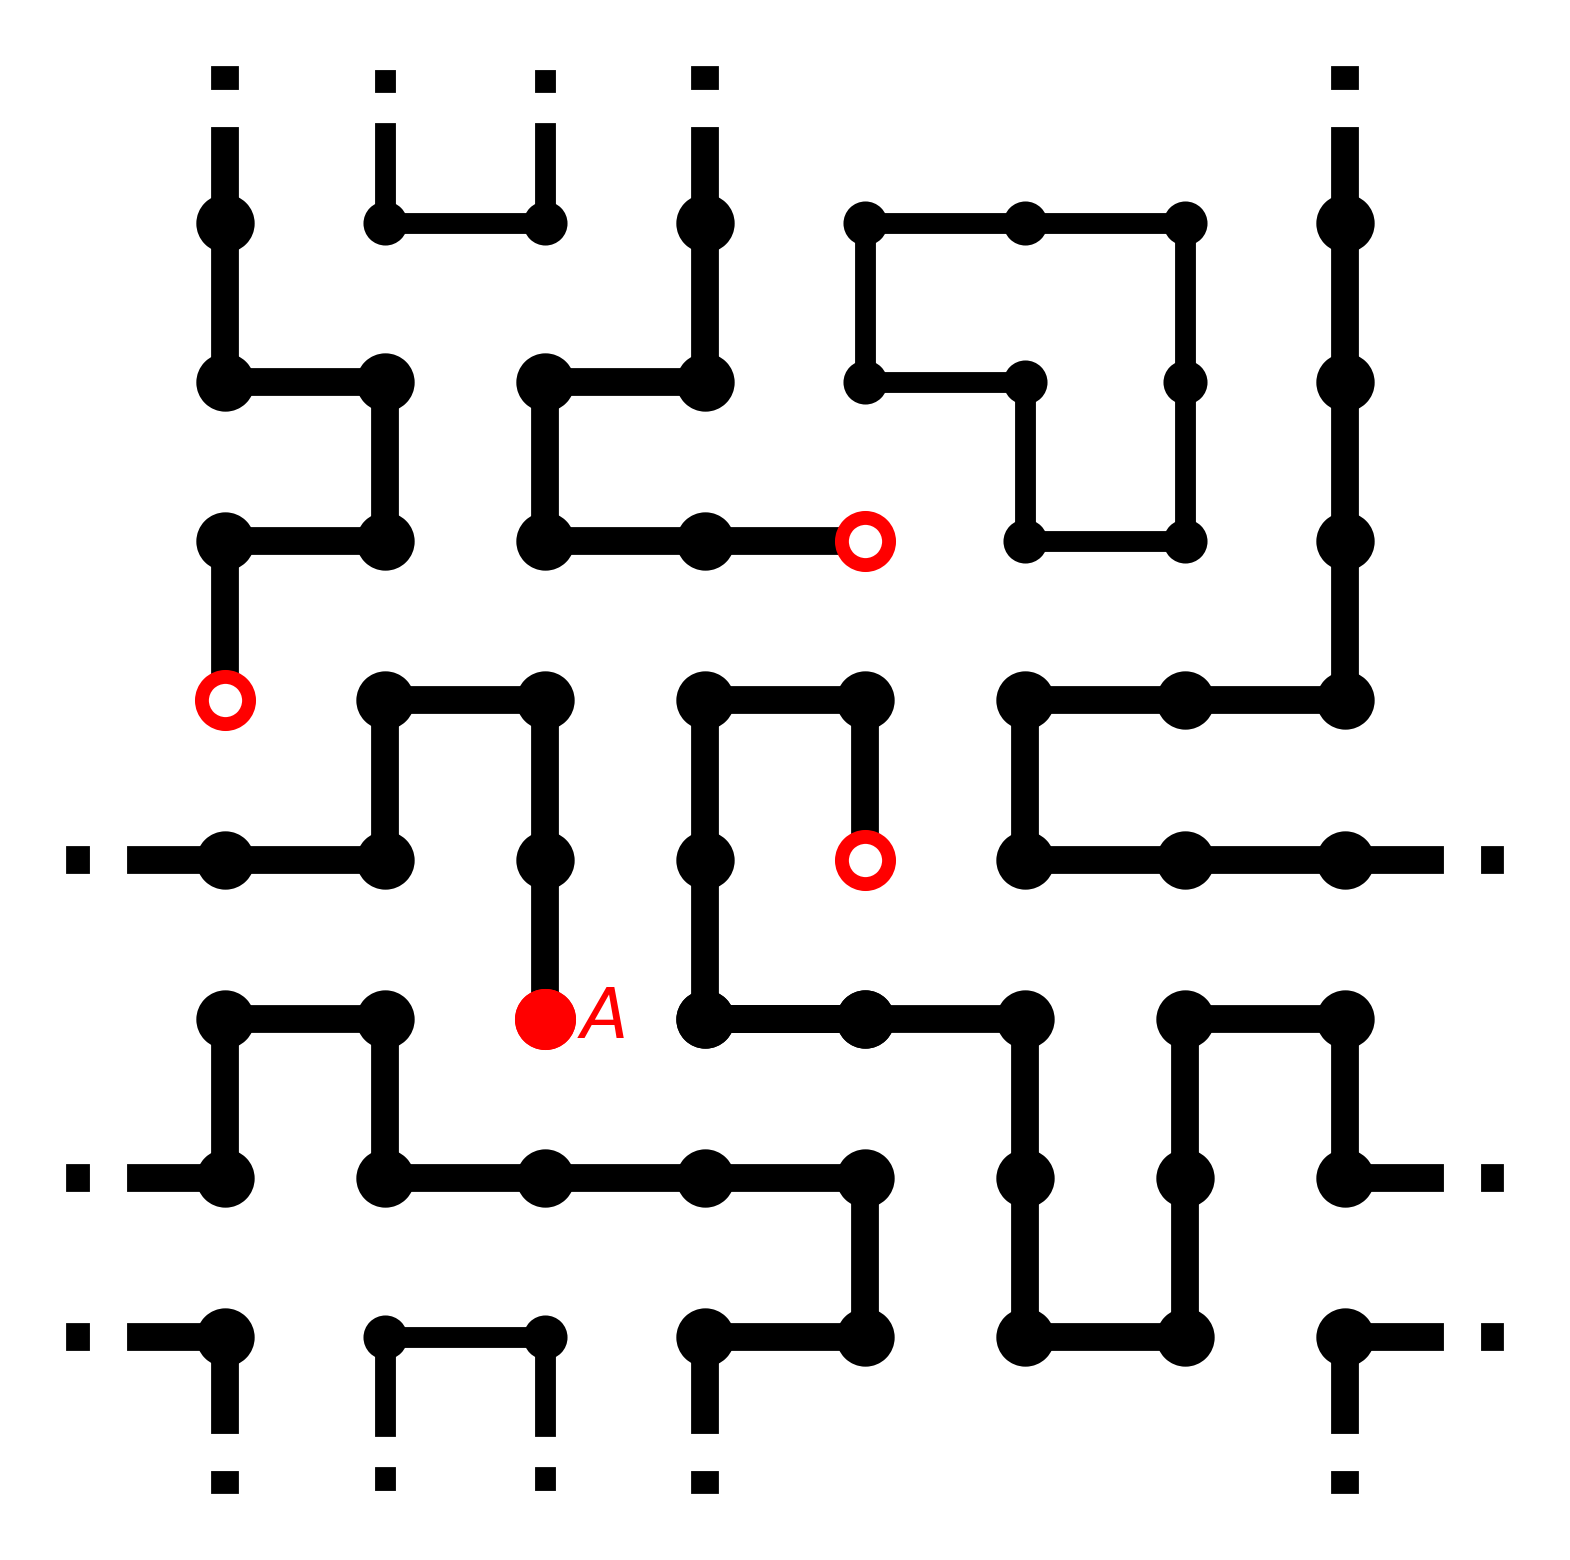

In [4]:
# Configuration 1: Base lattice, polymer chains, rings, and defect A
# - Builds an 8×8 lattice
# - Draws two polymer chains with bonds including periodic boundaries
# - Marks a single defect A and shows two ring structures

# Grid and visualization parameters
L = 8  # Lattice size (8x8 grid)
size_monomer = 768  # Size of monomer circles in plot
width_bond = 20  # Width of bonds connecting sites

# Initialize the lattice sites
sites_occupied = []  # list of occupied sites (for clarity; plotted all)
sites = []  # list of all lattice sites
for i in range(L):
    for j in range(L):
        sites_occupied.append([i, j])
        sites.append([i, j])
sites = np.array(sites)

# Base scatter of lattice sites
plt.figure(figsize=(20, 20))
plt.scatter(3, 3, s=size_monomer, facecolors='none', edgecolors='none', linewidth=4, zorder=-1)
plt.scatter(sites[:, 0], sites[:, 1], s=size_monomer, facecolors='k', edgecolors='k', linewidth=4)

# Define polymer chains
sites_chains = {}
sites_chains[0] = [[0, 4], [0, 5], [1, 5], [1, 6], [0, 6], [0, 7], [0, 0], [7, 0], [7, 7], [7, 6], [7, 5], [7, 4], [6, 4], [5, 4], [5, 3], [6, 3], [7, 3], [0, 3], [1, 3], [1, 4], [2, 4], [2, 3], [2, 2]]
sites_chains[0] = np.array(sites_chains[0])
sites_chains[1] = [[4, 3], [4, 4], [3, 4], [3, 3], [3, 2], [4, 2], [3, 2], [4, 2], [5, 2], [5, 1], [5, 0], [6, 0], [6, 1], [6, 2], [7, 2], [7, 1], [0, 1], [0, 2], [1, 2], [1, 1], [2, 1], [3, 1], [4, 1], [4, 0], [3, 0], [3, 7], [3, 6], [2, 6], [2, 5], [3, 5], [4, 5]]
sites_chains[1] = np.array(sites_chains[1])

# Draw polymer chains with periodic bonds
for i in range(len(sites_chains)):
    for j in range(len(sites_chains[i]) - 1):
        plt.scatter(sites_chains[i][j][0], sites_chains[i][j][1], s=4/3*size_monomer, facecolors='k', edgecolors='k', linewidth=10)
        d = L1_distance(sites_chains[i][j], sites_chains[i][j+1])
        if d == 1:
            # direct nearest-neighbor bond
            plt.plot([sites_chains[i][j][0], sites_chains[i][j+1][0]],
                     [sites_chains[i][j][1], sites_chains[i][j+1][1]],
                     color='k', linewidth=width_bond, zorder=0)
        elif d == L-1:
            # periodic boundary in x or y; draw split bonds + white gap to suggest wrap
            if np.abs(sites_chains[i][j][0] - sites_chains[i][j+1][0]) == L-1:
                if sites_chains[i][j][0] == 0:
                    plt.plot([sites_chains[i][j][0]-0.9, sites_chains[i][j][0]],
                             [sites_chains[i][j][1], sites_chains[i][j][1]], color='k', linewidth=width_bond, zorder=0)
                    plt.plot([sites_chains[i][j][0]-0.7, sites_chains[i][j][0]-0.75],
                             [sites_chains[i][j][1], sites_chains[i][j][1]], color='w', linewidth=width_bond+1, zorder=0)
                    plt.plot([sites_chains[i][j+1][0], sites_chains[i][j+1][0]+0.9],
                             [sites_chains[i][j+1][1], sites_chains[i][j+1][1]], color='k', linewidth=width_bond, zorder=0)
                    plt.plot([sites_chains[i][j+1][0]+0.7, sites_chains[i][j+1][0]+0.75],
                             [sites_chains[i][j+1][1], sites_chains[i][j+1][1]], color='w', linewidth=width_bond+1, zorder=0)
                else:
                    plt.plot([sites_chains[i][j][0], sites_chains[i][j][0]+0.9],
                             [sites_chains[i][j][1], sites_chains[i][j][1]], color='k', linewidth=width_bond, zorder=0)
                    plt.plot([sites_chains[i][j][0]+0.7, sites_chains[i][j][0]+0.75],
                             [sites_chains[i][j][1], sites_chains[i][j][1]], color='w', linewidth=width_bond+1, zorder=0)
                    plt.plot([sites_chains[i][j+1][0]-0.9, sites_chains[i][j+1][0]],
                             [sites_chains[i][j+1][1], sites_chains[i][j+1][1]], color='k', linewidth=width_bond, zorder=0)
                    plt.plot([sites_chains[i][j+1][0]-0.7, sites_chains[i][j+1][0]-0.75],
                             [sites_chains[i][j+1][1], sites_chains[i][j+1][1]], color='w', linewidth=width_bond+1, zorder=0)
            elif np.abs(sites_chains[i][j][1] - sites_chains[i][j+1][1]) == L-1:
                if sites_chains[i][j][1] == 0:
                    plt.plot([sites_chains[i][j][0], sites_chains[i][j][0]],
                             [sites_chains[i][j][1]-0.9, sites_chains[i][j][1]], color='k', linewidth=width_bond, zorder=0)
                    plt.plot([sites_chains[i][j][0], sites_chains[i][j][0]],
                             [sites_chains[i][j][1]-0.7, sites_chains[i][j][1]-0.75], color='w', linewidth=width_bond+1, zorder=0)
                    plt.plot([sites_chains[i][j+1][0], sites_chains[i][j+1][0]],
                             [sites_chains[i][j+1][1], sites_chains[i][j+1][1]+0.9], color='k', linewidth=width_bond, zorder=0)
                    plt.plot([sites_chains[i][j+1][0], sites_chains[i][j+1][0]],
                             [sites_chains[i][j+1][1]+0.7, sites_chains[i][j+1][1]+0.75], color='w', linewidth=width_bond+1, zorder=0)
                else:
                    plt.plot([sites_chains[i][j][0], sites_chains[i][j+1][0]],
                             [sites_chains[i][j][1], sites_chains[i][j][1]+0.9], color='k', linewidth=width_bond, zorder=0)
                    plt.plot([sites_chains[i][j][0], sites_chains[i][j+1][0]],
                             [sites_chains[i][j][1]+0.7, sites_chains[i][j][1]+0.75], color='w', linewidth=width_bond+1, zorder=0)
                    plt.plot([sites_chains[i][j+1][0], sites_chains[i][j+1][0]],
                             [sites_chains[i][j+1][1]-0.9, sites_chains[i][j+1][1]], color='k', linewidth=width_bond, zorder=0)
                    plt.plot([sites_chains[i][j+1][0], sites_chains[i][j+1][0]],
                             [sites_chains[i][j+1][1]-0.75, sites_chains[i][j+1][1]-0.7], color='w', linewidth=width_bond+1, zorder=0)
            else:
                print("Error in the distance between sites in the chain")
        else:
            print("Error in the distance between sites in the chain")
    # mark endpoints
    plt.scatter(sites_chains[i][0, 0], sites_chains[i][0, 1], s=1.5*size_monomer, facecolors='w', edgecolors='r', linewidth=10)
    plt.scatter(sites_chains[i][-1, 0], sites_chains[i][-1, 1], s=1.5*size_monomer, facecolors='w', edgecolors='r', linewidth=10)

# Defect A
plt.scatter(2, 2, s=1.5*size_monomer, facecolors='r', edgecolors='r', linewidth=10)
plt.text(2.35, 2, r'$A$', fontsize=50, ha='center', va='center', color='r', zorder=5)

# Ring structures
sites_rings = {}
sites_rings[0] = [[6, 6], [6, 7], [5, 7], [4, 7], [4, 6], [5, 6], [5, 5], [6, 5]]
sites_rings[0] = np.array(sites_rings[0])
sites_rings[1] = [[1, 0], [1, 7], [2, 7], [2, 0]]
sites_rings[1] = np.array(sites_rings[1])
for i in range(len(sites_rings)):
    for j in range(len(sites_rings[i]) - 1):
        d = L1_distance(sites_rings[i][j], sites_rings[i][j+1])
        if d == 1:
            plt.plot([sites_rings[i][j][0], sites_rings[i][j+1][0]],
                     [sites_rings[i][j][1], sites_rings[i][j+1][1]], color='k', linewidth=0.75*width_bond, zorder=0)
        elif d == L-1:
            if np.abs(sites_rings[i][j][0] - sites_rings[i][j+1][0]) == L-1:
                if sites_rings[i][j][0] == 0:
                    plt.plot([sites_rings[i][j][0]-0.9, sites_rings[i][j][0]],[sites_rings[i][j][1], sites_rings[i][j][1]], color='k', linewidth=0.75*width_bond)
                    plt.plot([sites_rings[i][j][0]-0.7, sites_rings[i][j][0]-0.75],[sites_rings[i][j][1], sites_rings[i][j][1]], color='w', linewidth=0.75*width_bond+1)
                    plt.plot([sites_rings[i][j+1][0], sites_rings[i][j+1][0]+0.9],[sites_rings[i][j+1][1], sites_rings[i][j+1][1]], color='k', linewidth=0.75*width_bond)
                    plt.plot([sites_rings[i][j+1][0]+0.7, sites_rings[i][j+1][0]+0.75],[sites_rings[i][j+1][1], sites_rings[i][j+1][1]], color='w', linewidth=0.75*width_bond+1)
                else:
                    plt.plot([sites_rings[i][j][0], sites_rings[i][j][0]+0.9],[sites_rings[i][j][1], sites_rings[i][j][1]], color='k', linewidth=0.75*width_bond)
                    plt.plot([sites_rings[i][j][0]+0.7, sites_rings[i][j][0]+0.75],[sites_rings[i][j][1], sites_rings[i][j][1]], color='w', linewidth=0.75*width_bond+1)
                    plt.plot([sites_rings[i][j+1][0]-0.9, sites_rings[i][j+1][0]],[sites_rings[i][j+1][1], sites_rings[i][j+1][1]], color='k', linewidth=0.75*width_bond)
                    plt.plot([sites_rings[i][j+1][0]-0.7, sites_rings[i][j+1][0]-0.75],[sites_rings[i][j+1][1], sites_rings[i][j+1][1]], color='w', linewidth=0.75*width_bond+1)
            elif np.abs(sites_rings[i][j][1] - sites_rings[i][j+1][1]) == L-1:
                if sites_rings[i][j][1] == 0:
                    plt.plot([sites_rings[i][j][0], sites_rings[i][j][0]],[sites_rings[i][j][1]-0.9, sites_rings[i][j][1]], color='k', linewidth=0.75*width_bond)
                    plt.plot([sites_rings[i][j][0], sites_rings[i][j][0]],[sites_rings[i][j][1]-0.7, sites_rings[i][j][1]-0.75], color='w', linewidth=0.75*width_bond+1)
                    plt.plot([sites_rings[i][j+1][0], sites_rings[i][j+1][0]],[sites_rings[i][j+1][1], sites_rings[i][j+1][1]+0.9], color='k', linewidth=0.75*width_bond)
                    plt.plot([sites_rings[i][j+1][0], sites_rings[i][j+1][0]],[sites_rings[i][j+1][1]+0.7, sites_rings[i][j+1][1]+0.75], color='w', linewidth=0.75*width_bond+1)
                else:
                    plt.plot([sites_rings[i][j][0], sites_rings[i][j+1][0]],[sites_rings[i][j][1], sites_rings[i][j][1]+0.9], color='k', linewidth=0.75*width_bond)
                    plt.plot([sites_rings[i][j][0], sites_rings[i][j+1][0]],[sites_rings[i][j][1]+0.7, sites_rings[i][j][1]+0.75], color='w', linewidth=0.75*width_bond+1)
                    plt.plot([sites_rings[i][j+1][0], sites_rings[i][j+1][0]],[sites_rings[i][j+1][1]-0.9, sites_rings[i][j+1][1]], color='k', linewidth=0.75*width_bond)
                    plt.plot([sites_rings[i][j+1][0], sites_rings[i][j+1][0]],[sites_rings[i][j+1][1]-0.75, sites_rings[i][j+1][1]-0.7], color='w', linewidth=0.75*width_bond+1)
            else:
                print("Error in the distance between sites in the ring")
        else:
            print("Error in the distance between sites in the ring")
# Close the ring
for i in range(len(sites_rings)):
    plt.plot([sites_rings[i][-1][0], sites_rings[i][0][0]],
             [sites_rings[i][-1][1], sites_rings[i][0][1]], color='k', linewidth=0.75*width_bond, zorder=0)

# Save fig
plt.axis('off')
plt.savefig('configuration_sketch_1.png', dpi=300, bbox_inches="tight")
plt.savefig('configuration_sketch_1.pdf', dpi=300, bbox_inches="tight")
plt.show()

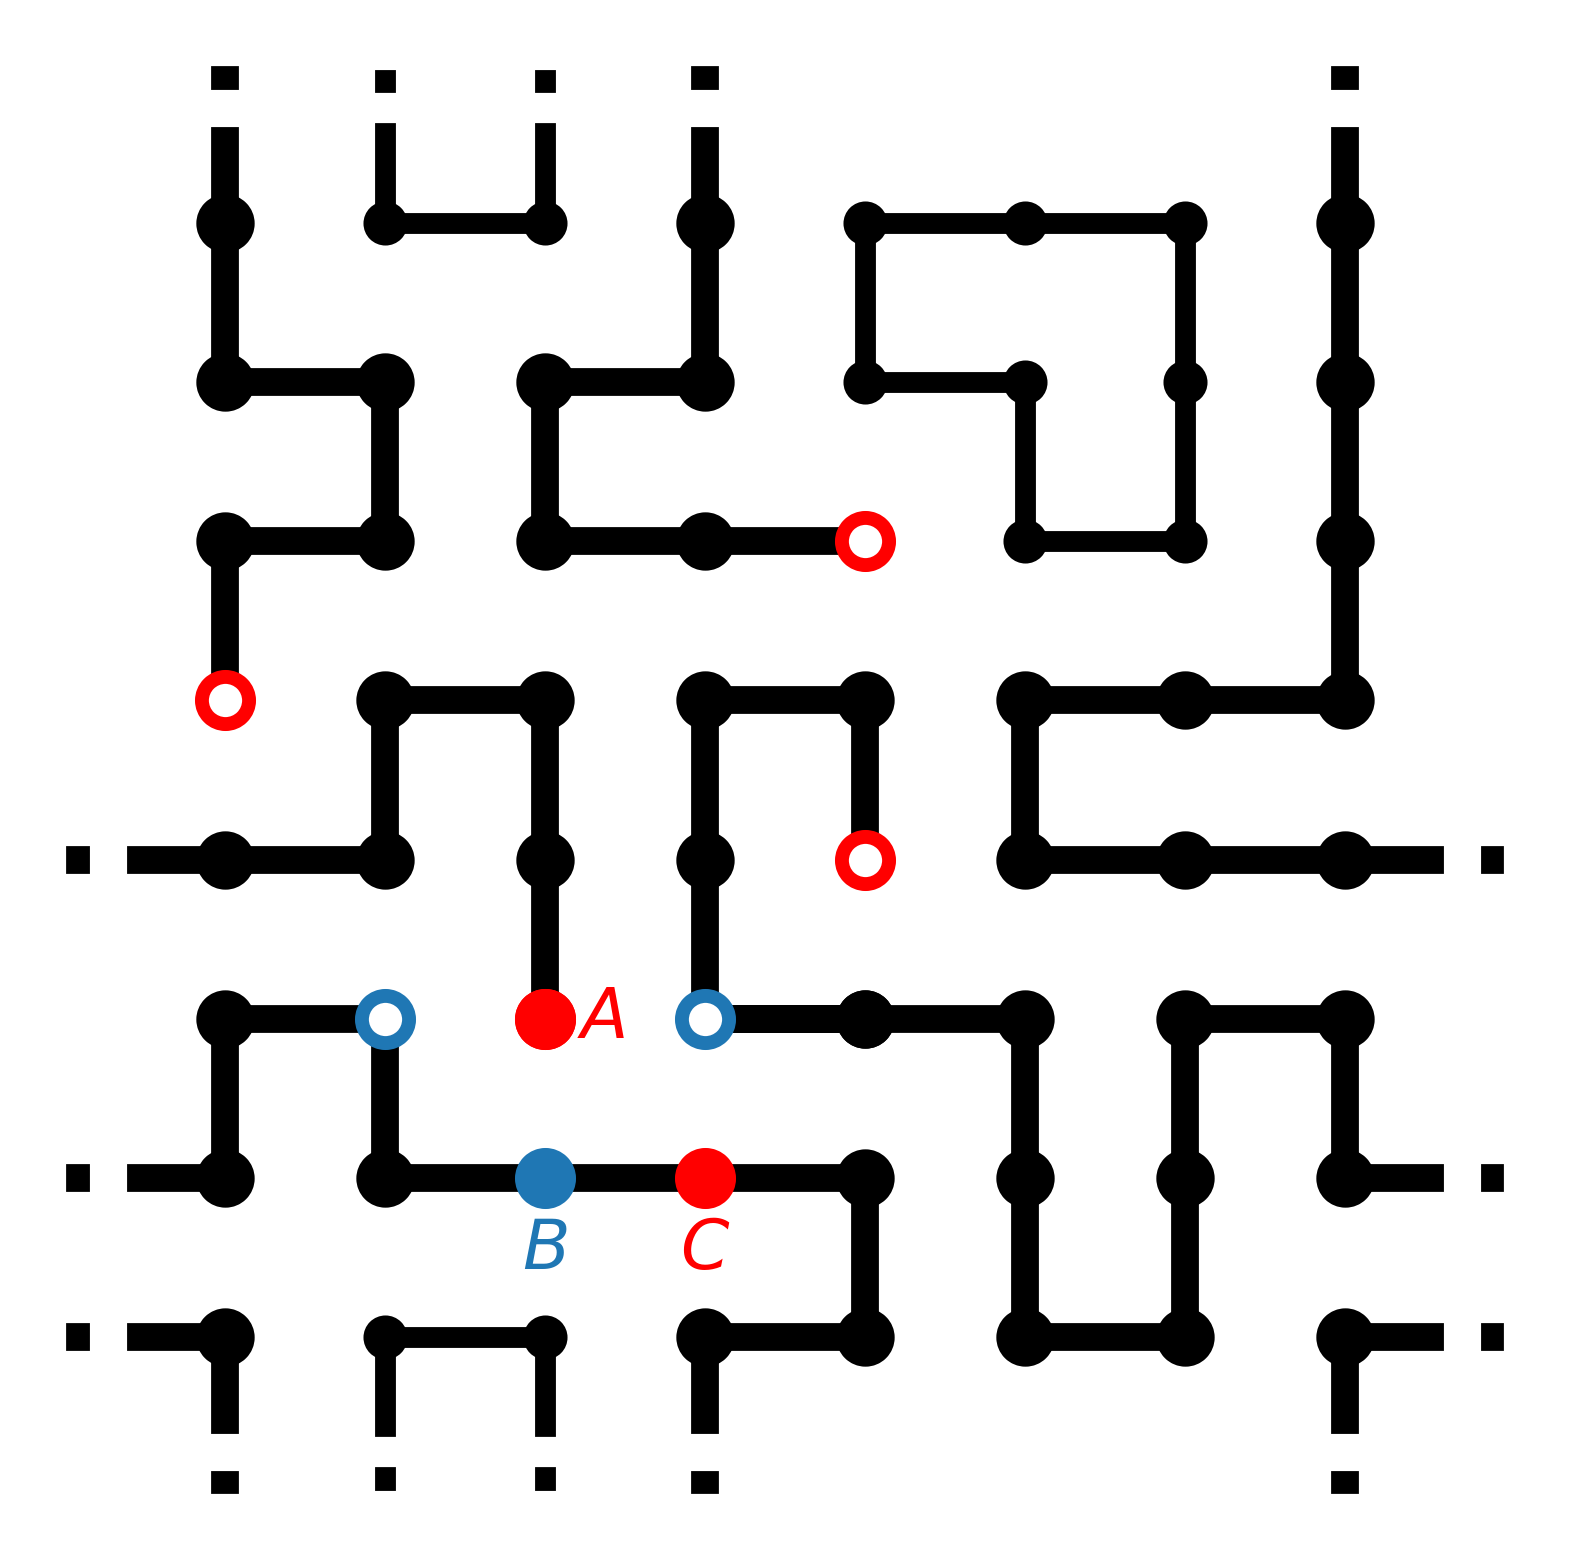

In [5]:
# ===== Configuration 2: Adding point B and defect markers =====
# This cell creates a similar configuration but with additional markers

plt.figure(figsize=(20, 20))
plt.scatter(3, 3, s=size_monomer, facecolors='none', edgecolors='none', linewidth=4, zorder=-1)
plt.scatter(sites[:, 0], sites[:, 1], s=size_monomer, facecolors='k', edgecolors='k', linewidth=4)

# ===== Define polymer chains (same as Configuration 1) =====
sites_chains = {}
sites_chains[0] = [[0, 4], [0, 5], [1, 5], [1, 6], [0, 6], [0, 7], [0, 0], [7, 0], [7, 7], [7, 6], [7, 5], [7, 4], [6, 4], [5, 4], [5, 3], [6, 3], [7, 3], [0, 3], [1, 3], [1, 4], [2, 4], [2, 3], [2, 2]]
sites_chains[0] = np.array(sites_chains[0])
sites_chains[1] = [[4, 3], [4, 4], [3, 4], [3, 3], [3, 2], [4, 2], [3, 2], [4, 2], [5, 2], [5, 1], [5, 0], [6, 0], [6, 1], [6, 2], [7, 2], [7, 1], [0, 1], [0, 2], [1, 2], [1, 1], [2, 1], [3, 1], [4, 1], [4, 0], [3, 0], [3, 7], [3, 6], [2, 6], [2, 5], [3, 5], [4, 5]]
sites_chains[1] = np.array(sites_chains[1])

# ===== Draw polymer chains (same logic as Configuration 1) =====
for i in range(sites_chains.keys().__len__()):
    for j in range(len(sites_chains[i]) - 1):
        plt.scatter(sites_chains[i][j][0], sites_chains[i][j][1], s=4/3*size_monomer, facecolors='k', edgecolors='k', linewidth=10)
        if L1_distance(sites_chains[i][j], sites_chains[i][j+1]) == 1:
            x_values = [sites_chains[i][j][0], sites_chains[i][j+1][0]]
            y_values = [sites_chains[i][j][1], sites_chains[i][j+1][1]]
            plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0)
        elif L1_distance(sites_chains[i][j], sites_chains[i][j+1]) == L-1:
            if np.abs(sites_chains[i][j][0] - sites_chains[i][j+1][0]) == L-1:
                if sites_chains[i][j][0] == 0:
                    x_values = [sites_chains[i][j][0]-0.9, sites_chains[i][j][0]]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0]-0.7, sites_chains[i][j][0]-0.75]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]+0.9]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0]+0.7, sites_chains[i][j+1][0]+0.75]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_chains[i][j][0], sites_chains[i][j][0]+0.9]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0]+0.7, sites_chains[i][j][0]+0.75]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0]-0.9, sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0]-0.7, sites_chains[i][j+1][0]-0.75]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
            elif np.abs(sites_chains[i][j][1] - sites_chains[i][j+1][1]) == L-1:
                if sites_chains[i][j][1] == 0:
                    x_values = [sites_chains[i][j][0], sites_chains[i][j][0]]
                    y_values = [sites_chains[i][j][1]-0.9, sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0], sites_chains[i][j][0]]
                    y_values = [sites_chains[i][j][1]-0.7, sites_chains[i][j][1]-0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1]+0.7, sites_chains[i][j+1][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_chains[i][j][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j][1]+0.7, sites_chains[i][j][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1]-0.9, sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1]-0.75, sites_chains[i][j+1][1]-0.7]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
            else:
                print("Error in the distance between sites in the chain")
        else:
            print("Error in the distance between sites in the chain")
    # Mark chain endpoints
    plt.scatter(sites_chains[i][0, 0], sites_chains[i][0, 1], s=1.5*size_monomer, facecolors='w', edgecolors='r', linewidth=10)
    plt.scatter(sites_chains[i][-1, 0], sites_chains[i][-1, 1], s=1.5*size_monomer, facecolors='w', edgecolors='r', linewidth=10)

# ===== NEW: Add defect markers A and B =====
# Point A (red): original defect
plt.scatter(2, 2, s=1.5*size_monomer, facecolors='r', edgecolors='r', linewidth=10)
plt.text(2.35, 2, r'$A$', fontsize=50, ha='center', va='center', color='r', zorder=5)

# Point B (blue): new defect at position (2, 1)
plt.text(2, 0.55, r'$B$', fontsize=50, ha='center', va='center', color='tab:blue', zorder=5)
plt.scatter(2, 1, s=1.5*size_monomer, facecolors='tab:blue', edgecolors='tab:blue', linewidth=10)

# Point C (red): new defect at position (3, 1)
plt.text(3, 0.55, r'$C$', fontsize=50, ha='center', va='center', color='r', zorder=5)
plt.scatter(3, 1, s=1.5*size_monomer, facecolors='r', edgecolors='r', linewidth=10)

# Additional blue markers showing defect positions
plt.scatter(3, 2, s=1.5*size_monomer, facecolors='w', edgecolors='tab:blue', linewidth=10)
plt.scatter(1, 2, s=1.5*size_monomer, facecolors='w', edgecolors='tab:blue', linewidth=10)

# ===== Define and draw ring structures (same as Configuration 1) =====
sites_rings = {}
sites_rings[0] = [[6, 6], [6, 7], [5, 7], [4, 7], [4, 6], [5, 6], [5, 5], [6, 5]]
sites_rings[0] = np.array(sites_rings[0])
sites_rings[1] = [[1, 0], [1, 7], [2, 7], [2, 0]]
sites_rings[1] = np.array(sites_rings[1])

for i in range(sites_rings.keys().__len__()):   
    for j in range(len(sites_rings[i]) - 1):
        if L1_distance(sites_rings[i][j], sites_rings[i][j+1]) == 1:
            x_values = [sites_rings[i][j][0], sites_rings[i][j+1][0]]
            y_values = [sites_rings[i][j][1], sites_rings[i][j+1][1]]
            plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0)
        elif L1_distance(sites_rings[i][j], sites_rings[i][j+1]) == L-1:
            if np.abs(sites_rings[i][j][0] - sites_rings[i][j+1][0]) == L-1:
                if sites_rings[i][j][0] == 0:
                    x_values = [sites_rings[i][j][0]-0.9, sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j][0]-0.7, sites_rings[i][j][0]-0.75]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]+0.9]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0]+0.7, sites_rings[i][j+1][0]+0.75]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]+0.9]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j][0]+0.7, sites_rings[i][j][0]+0.75]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0]-0.9, sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0]-0.7, sites_rings[i][j+1][0]-0.75]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
            elif np.abs(sites_rings[i][j][1] - sites_rings[i][j+1][1]) == L-1:
                if sites_rings[i][j][1] == 0:
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1]-0.9, sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1]-0.7, sites_rings[i][j][1]-0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1]+0.7, sites_rings[i][j+1][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1]+0.7, sites_rings[i][j][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1]-0.9, sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1]-0.75, sites_rings[i][j+1][1]-0.7]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
            else:
                print("Error in the distance between sites in the ring")
        else:
            print("Error in the distance between sites in the ring")
    # Close the ring
    x_values = [sites_rings[i][-1][0], sites_rings[i][0][0]]
    y_values = [sites_rings[i][-1][1], sites_rings[i][0][1]]
    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0)

# ===== Save Configuration 2 =====
plt.axis('off')
plt.savefig('configuration_sketch_2.png', dpi=300, bbox_inches="tight")
plt.savefig('configuration_sketch_2.pdf', dpi=300, bbox_inches="tight")
plt.show()

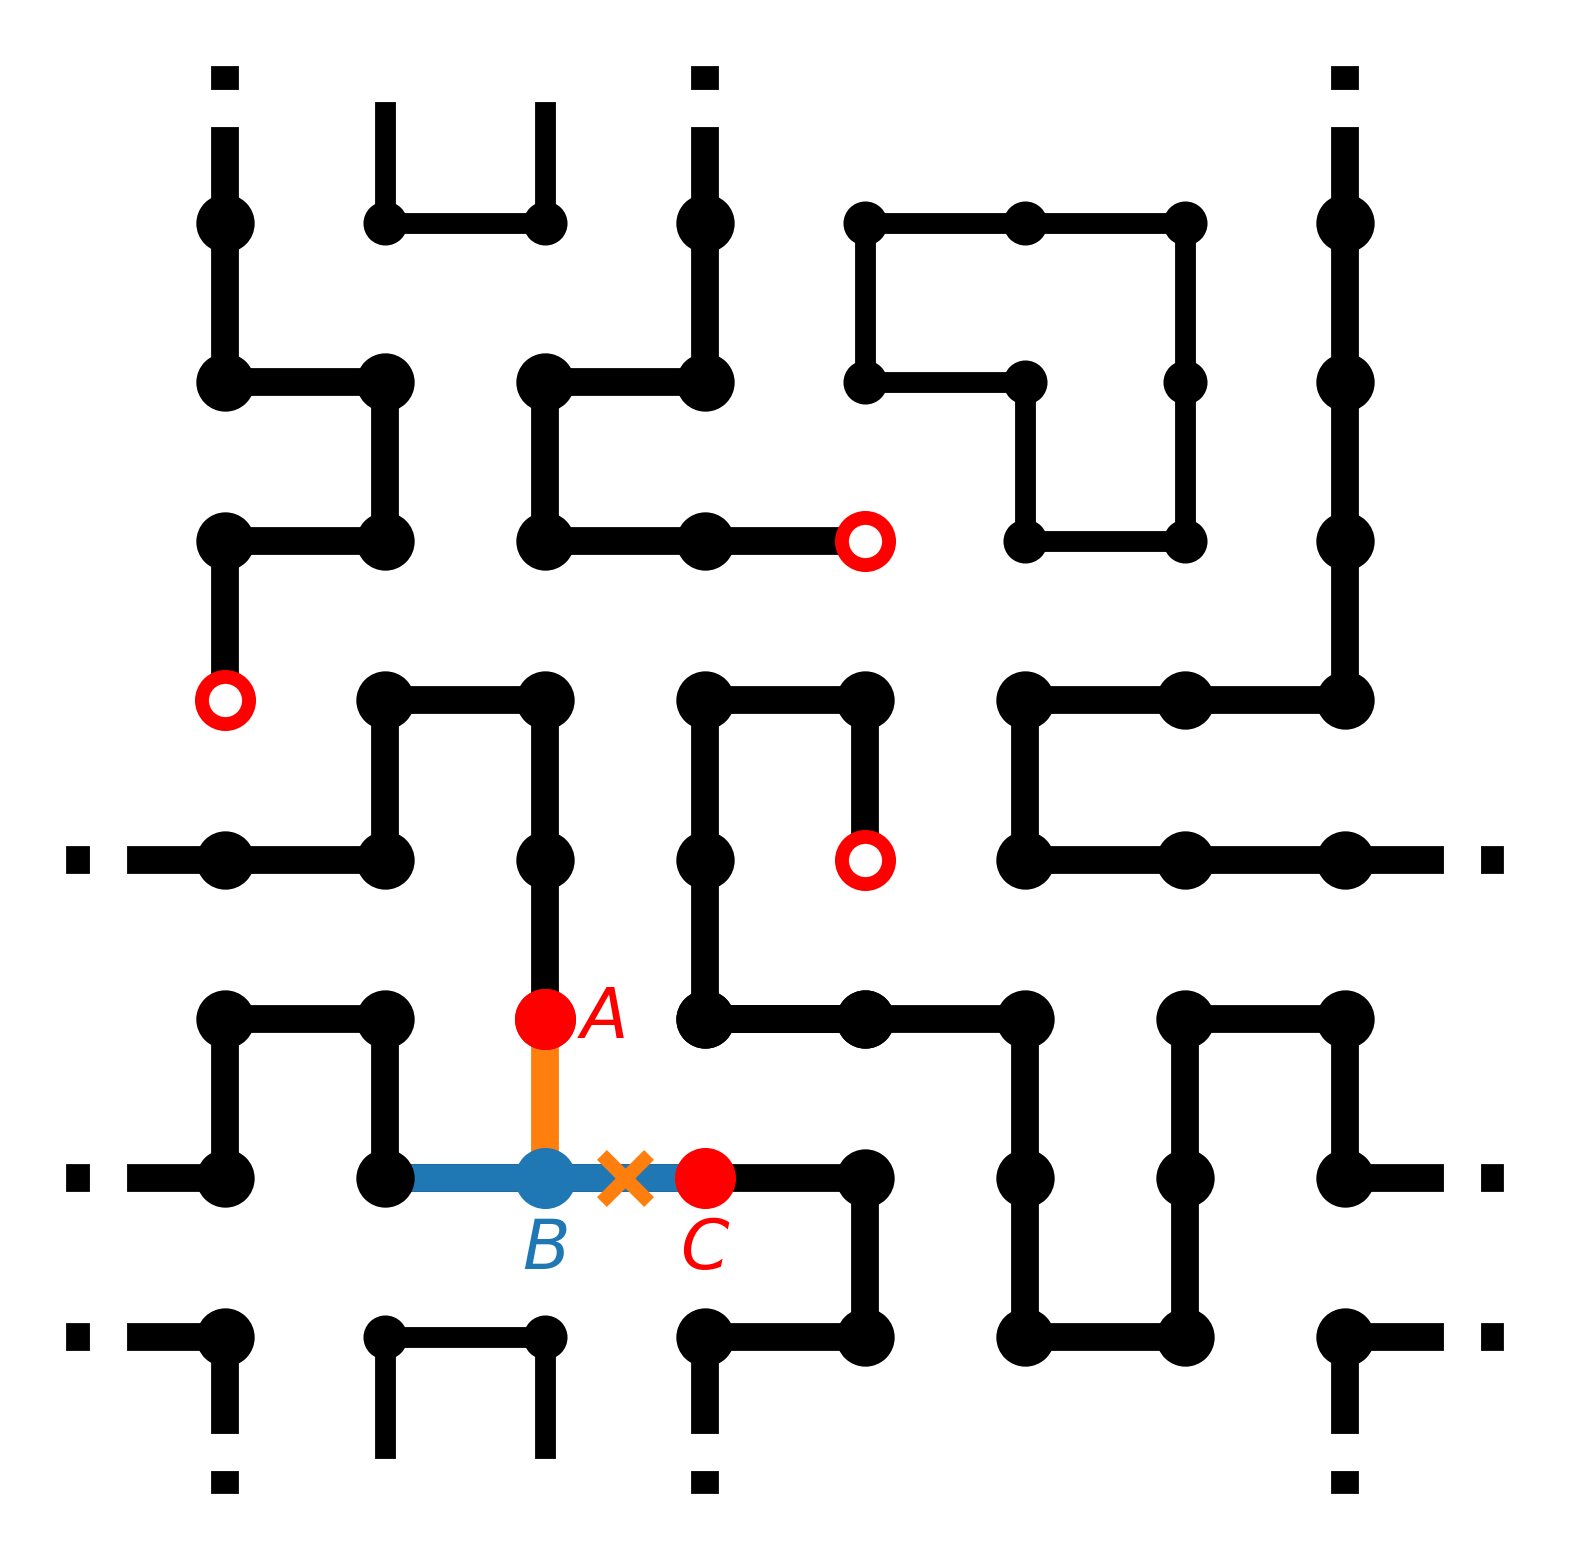

In [6]:
# ===== Configuration 3: Showing bond interactions between defects =====
# This configuration shows the interaction between defects A and B with colored bonds

plt.figure(figsize=(20, 20))
plt.scatter(3, 3, s=size_monomer, facecolors='none', edgecolors='none', linewidth=4, zorder=-1)
plt.scatter(sites[:, 0], sites[:, 1], s=size_monomer, facecolors='k', edgecolors='k', linewidth=4)

# ===== Define polymer chains (same as previous configurations) =====
sites_chains = {}
sites_chains[0] = [[0, 4], [0, 5], [1, 5], [1, 6], [0, 6], [0, 7], [0, 0], [7, 0], [7, 7], [7, 6], [7, 5], [7, 4], [6, 4], [5, 4], [5, 3], [6, 3], [7, 3], [0, 3], [1, 3], [1, 4], [2, 4], [2, 3], [2, 2]]
sites_chains[0] = np.array(sites_chains[0])
sites_chains[1] = [[4, 3], [4, 4], [3, 4], [3, 3], [3, 2], [4, 2], [3, 2], [4, 2], [5, 2], [5, 1], [5, 0], [6, 0], [6, 1], [6, 2], [7, 2], [7, 1], [0, 1], [0, 2], [1, 2], [1, 1], [2, 1], [3, 1], [4, 1], [4, 0], [3, 0], [3, 7], [3, 6], [2, 6], [2, 5], [3, 5], [4, 5]]
sites_chains[1] = np.array(sites_chains[1])

# ===== Draw polymer chains (same logic) =====
for i in range(sites_chains.keys().__len__()):
    for j in range(len(sites_chains[i]) - 1):
        plt.scatter(sites_chains[i][j][0], sites_chains[i][j][1], s=4/3*size_monomer, facecolors='k', edgecolors='k', linewidth=10)
        if L1_distance(sites_chains[i][j], sites_chains[i][j+1]) == 1:
            x_values = [sites_chains[i][j][0], sites_chains[i][j+1][0]]
            y_values = [sites_chains[i][j][1], sites_chains[i][j+1][1]]
            plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0)
        elif L1_distance(sites_chains[i][j], sites_chains[i][j+1]) == L-1:
            if np.abs(sites_chains[i][j][0] - sites_chains[i][j+1][0]) == L-1:
                if sites_chains[i][j][0] == 0:
                    x_values = [sites_chains[i][j][0]-0.9, sites_chains[i][j][0]]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0]-0.7, sites_chains[i][j][0]-0.75]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]+0.9]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0]+0.7, sites_chains[i][j+1][0]+0.75]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_chains[i][j][0], sites_chains[i][j][0]+0.9]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0]+0.7, sites_chains[i][j][0]+0.75]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0]-0.9, sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0]-0.7, sites_chains[i][j+1][0]-0.75]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
            elif np.abs(sites_chains[i][j][1] - sites_chains[i][j+1][1]) == L-1:
                if sites_chains[i][j][1] == 0:
                    x_values = [sites_chains[i][j][0], sites_chains[i][j][0]]
                    y_values = [sites_chains[i][j][1]-0.9, sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0], sites_chains[i][j][0]]
                    y_values = [sites_chains[i][j][1]-0.7, sites_chains[i][j][1]-0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1]+0.7, sites_chains[i][j+1][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_chains[i][j][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j][1]+0.7, sites_chains[i][j][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1]-0.9, sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1]-0.75, sites_chains[i][j+1][1]-0.7]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
            else:
                print("Error in the distance between sites in the chain")
        else:
            print("Error in the distance between sites in the chain")
    # Mark chain endpoints
    plt.scatter(sites_chains[i][0, 0], sites_chains[i][0, 1], s=1.5*size_monomer, facecolors='w', edgecolors='r', linewidth=10)
    plt.scatter(sites_chains[i][-1, 0], sites_chains[i][-1, 1], s=1.5*size_monomer, facecolors='w', edgecolors='r', linewidth=10)

# ===== Mark defects A, B, C =====
plt.scatter(2, 2, s=1.5*size_monomer, facecolors='r', edgecolors='r', linewidth=10)
plt.scatter(2, 1, s=1.5*size_monomer, facecolors='tab:blue', edgecolors='tab:blue', linewidth=10)
plt.scatter(3, 1, s=1.5*size_monomer, facecolors='r', edgecolors='r', linewidth=10)
plt.text(2.35, 2, r'$A$', fontsize=50, ha='center', va='center', color='r', zorder=5)
plt.text(2, 0.55, r'$B$', fontsize=50, ha='center', va='center', color='tab:blue', zorder=5)
plt.text(3, 0.55, r'$C$', fontsize=50, ha='center', va='center', color='r', zorder=5)

# ===== NEW: Draw colored bonds showing defect interactions =====
# Blue bonds: horizontal connections from defect B
plt.plot([1, 2], [1, 1], color='tab:blue', linewidth=width_bond, zorder=0)
plt.plot([2, 3], [1, 1], color='tab:blue', linewidth=width_bond, zorder=0)

# Orange bond: vertical connection between defects
plt.plot([2, 2], [1, 2], color='tab:orange', linewidth=width_bond, zorder=0)

# Cross marker showing interaction point
plt.scatter(2.5, 1, marker='x', s=1.5*size_monomer, facecolors='tab:orange', linewidth=10)

# ===== Define and draw ring structures with modified periodic boundaries =====
sites_rings = {}
sites_rings[0] = [[6, 6], [6, 7], [5, 7], [4, 7], [4, 6], [5, 6], [5, 5], [6, 5]]
sites_rings[0] = np.array(sites_rings[0])
sites_rings[1] = [[1, 0], [1, 7], [2, 7], [2, 0]]
sites_rings[1] = np.array(sites_rings[1])

for i in range(sites_rings.keys().__len__()):   
    for j in range(len(sites_rings[i]) - 1):
        if L1_distance(sites_rings[i][j], sites_rings[i][j+1]) == 1:
            x_values = [sites_rings[i][j][0], sites_rings[i][j+1][0]]
            y_values = [sites_rings[i][j][1], sites_rings[i][j+1][1]]
            plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0)
        elif L1_distance(sites_rings[i][j], sites_rings[i][j+1]) == L-1:
            # Modified periodic boundary representation (simplified without white gaps)
            if np.abs(sites_rings[i][j][0] - sites_rings[i][j+1][0]) == L-1:
                y_values = [sites_rings[i][j][1], sites_rings[i][j+1][1]]
                if sites_rings[i][j][0] == 0:
                    # Draw shorter bonds at boundaries
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]-0.7]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0]+0.7, sites_rings[i][j+1][0]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                else:
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]+0.7]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0]-0.7, sites_rings[i][j+1][0]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
            elif np.abs(sites_rings[i][j][1] - sites_rings[i][j+1][1]) == L-1:
                x_values = [sites_rings[i][j][0], sites_rings[i][j+1][0]]
                if sites_rings[i][j][1] == 0:
                    y_values = [sites_rings[i][j][1]-0.7, sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]+0.7]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                else:
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]+0.7]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    y_values = [sites_rings[i][j+1][1]-0.7, sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
            else:
                print("Error in the distance between sites in the ring")
        else:
            print("Error in the distance between sites in the ring")
    # Close the ring
    x_values = [sites_rings[i][-1][0], sites_rings[i][0][0]]
    y_values = [sites_rings[i][-1][1], sites_rings[i][0][1]]
    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0)

# ===== Save Configuration 3 =====
plt.axis('off')
plt.savefig('configuration_sketch_3.png', dpi=300, bbox_inches="tight")
plt.savefig('configuration_sketch_3.pdf', dpi=300, bbox_inches="tight")
plt.show()

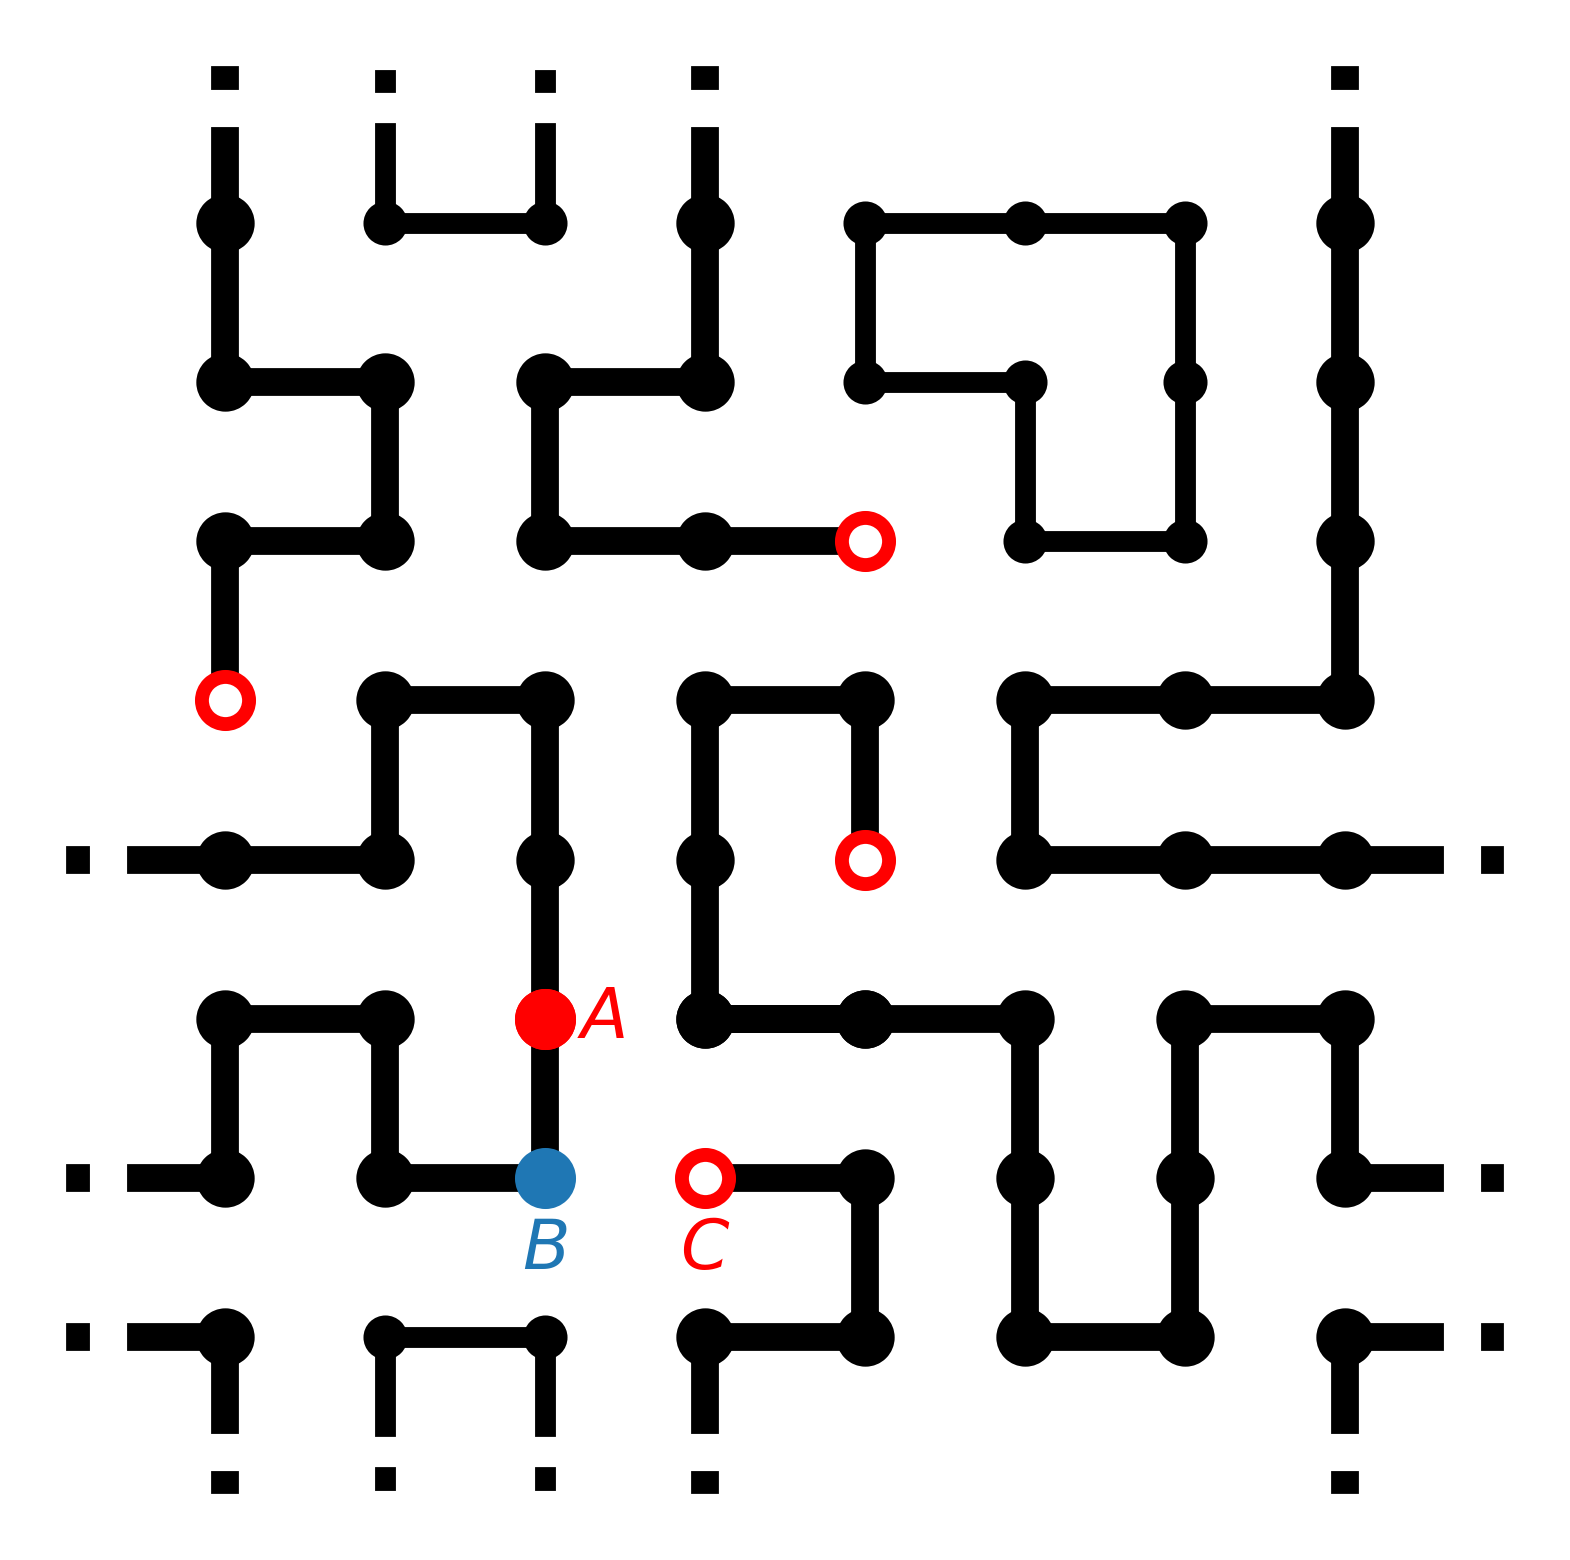

In [7]:
# ===== Configuration 4: Final state with bond breaking =====
# This configuration shows the final state after defect interaction with a broken bond

plt.figure(figsize=(20, 20))
plt.scatter(3, 3, s=size_monomer, facecolors='none', edgecolors='none', linewidth=4, zorder=-1)
plt.scatter(sites[:, 0], sites[:, 1], s=size_monomer, facecolors='k', edgecolors='k', linewidth=4)

# ===== Define polymer chains (same as previous) =====
sites_chains = {}
sites_chains[0] = [[0, 4], [0, 5], [1, 5], [1, 6], [0, 6], [0, 7], [0, 0], [7, 0], [7, 7], [7, 6], [7, 5], [7, 4], [6, 4], [5, 4], [5, 3], [6, 3], [7, 3], [0, 3], [1, 3], [1, 4], [2, 4], [2, 3], [2, 2]]
sites_chains[0] = np.array(sites_chains[0])
sites_chains[1] = [[4, 3], [4, 4], [3, 4], [3, 3], [3, 2], [4, 2], [3, 2], [4, 2], [5, 2], [5, 1], [5, 0], [6, 0], [6, 1], [6, 2], [7, 2], [7, 1], [0, 1], [0, 2], [1, 2], [1, 1], [2, 1], [3, 1], [4, 1], [4, 0], [3, 0], [3, 7], [3, 6], [2, 6], [2, 5], [3, 5], [4, 5]]
sites_chains[1] = np.array(sites_chains[1])

# ===== Draw polymer chains =====
for i in range(sites_chains.keys().__len__()):
    for j in range(len(sites_chains[i]) - 1):
        plt.scatter(sites_chains[i][j][0], sites_chains[i][j][1], s=4/3*size_monomer, facecolors='k', edgecolors='k', linewidth=10)
        if L1_distance(sites_chains[i][j], sites_chains[i][j+1]) == 1:
            x_values = [sites_chains[i][j][0], sites_chains[i][j+1][0]]
            y_values = [sites_chains[i][j][1], sites_chains[i][j+1][1]]
            plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0)
        elif L1_distance(sites_chains[i][j], sites_chains[i][j+1]) == L-1:
            if np.abs(sites_chains[i][j][0] - sites_chains[i][j+1][0]) == L-1:
                if sites_chains[i][j][0] == 0:
                    x_values = [sites_chains[i][j][0]-0.9, sites_chains[i][j][0]]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0]-0.7, sites_chains[i][j][0]-0.75]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]+0.9]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0]+0.7, sites_chains[i][j+1][0]+0.75]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_chains[i][j][0], sites_chains[i][j][0]+0.9]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0]+0.7, sites_chains[i][j][0]+0.75]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0]-0.9, sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0]-0.7, sites_chains[i][j+1][0]-0.75]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
            elif np.abs(sites_chains[i][j][1] - sites_chains[i][j+1][1]) == L-1:
                if sites_chains[i][j][1] == 0:
                    x_values = [sites_chains[i][j][0], sites_chains[i][j][0]]
                    y_values = [sites_chains[i][j][1]-0.9, sites_chains[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0], sites_chains[i][j][0]]
                    y_values = [sites_chains[i][j][1]-0.7, sites_chains[i][j][1]-0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1], sites_chains[i][j+1][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1]+0.7, sites_chains[i][j+1][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_chains[i][j][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j][1], sites_chains[i][j][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j][1]+0.7, sites_chains[i][j][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1]-0.9, sites_chains[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=width_bond, zorder=0, linestyle='-')
                    x_values = [sites_chains[i][j+1][0], sites_chains[i][j+1][0]]
                    y_values = [sites_chains[i][j+1][1]-0.75, sites_chains[i][j+1][1]-0.7]
                    plt.plot(x_values, y_values, color='w', linewidth=width_bond+1, zorder=0, linestyle='-')
            else:
                print("Error in the distance between sites in the chain")
        else:
            print("Error in the distance between sites in the chain")
    # Mark chain endpoints
    plt.scatter(sites_chains[i][0, 0], sites_chains[i][0, 1], s=1.5*size_monomer, facecolors='w', edgecolors='r', linewidth=10)
    plt.scatter(sites_chains[i][-1, 0], sites_chains[i][-1, 1], s=1.5*size_monomer, facecolors='w', edgecolors='r', linewidth=10)

# ===== Mark defects =====
plt.scatter(2, 2, s=1.5*size_monomer, facecolors='r', edgecolors='r', linewidth=10)
plt.scatter(2, 1, s=1.5*size_monomer, facecolors='tab:blue', edgecolors='tab:blue', linewidth=10)
plt.text(2.35, 2, r'$A$', fontsize=50, ha='center', va='center', color='r', zorder=5)
plt.text(2, 0.55, r'$B$', fontsize=50, ha='center', va='center', color='tab:blue', zorder=5)
plt.text(3, 0.55, r'$C$', fontsize=50, ha='center', va='center', color='r', zorder=5)

# ===== NEW: Show new chain endpoint and broken bond =====
# New chain endpoint at position (3, 1) marked with red circle
plt.scatter(3, 1, s=1.5*size_monomer, facecolors='w', edgecolors='r', linewidth=10)

# Black bond connecting defects vertically
plt.plot([2, 2], [1, 2], color='k', linewidth=width_bond, zorder=0)

# White overlay showing broken bond (erases part of the connection)
plt.plot([2, 3], [1, 1], color='w', linewidth=width_bond+2, zorder=0)

# ===== Define and draw ring structures (same as Configuration 2) =====
sites_rings = {}
sites_rings[0] = [[6, 6], [6, 7], [5, 7], [4, 7], [4, 6], [5, 6], [5, 5], [6, 5]]
sites_rings[0] = np.array(sites_rings[0])
sites_rings[1] = [[1, 0], [1, 7], [2, 7], [2, 0]]
sites_rings[1] = np.array(sites_rings[1])

for i in range(sites_rings.keys().__len__()):   
    for j in range(len(sites_rings[i]) - 1):
        if L1_distance(sites_rings[i][j], sites_rings[i][j+1]) == 1:
            x_values = [sites_rings[i][j][0], sites_rings[i][j+1][0]]
            y_values = [sites_rings[i][j][1], sites_rings[i][j+1][1]]
            plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0)
        elif L1_distance(sites_rings[i][j], sites_rings[i][j+1]) == L-1:
            if np.abs(sites_rings[i][j][0] - sites_rings[i][j+1][0]) == L-1:
                if sites_rings[i][j][0] == 0:
                    x_values = [sites_rings[i][j][0]-0.9, sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j][0]-0.7, sites_rings[i][j][0]-0.75]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]+0.9]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0]+0.7, sites_rings[i][j+1][0]+0.75]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]+0.9]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j][0]+0.7, sites_rings[i][j][0]+0.75]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0]-0.9, sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0]-0.7, sites_rings[i][j+1][0]-0.75]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
            elif np.abs(sites_rings[i][j][1] - sites_rings[i][j+1][1]) == L-1:
                if sites_rings[i][j][1] == 0:
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1]-0.9, sites_rings[i][j][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1]-0.7, sites_rings[i][j][1]-0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1], sites_rings[i][j+1][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1]+0.7, sites_rings[i][j+1][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                else:
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1], sites_rings[i][j][1]+0.9]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j][0], sites_rings[i][j][0]]
                    y_values = [sites_rings[i][j][1]+0.7, sites_rings[i][j][1]+0.75]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1]-0.9, sites_rings[i][j+1][1]]
                    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0, linestyle='-')
                    x_values = [sites_rings[i][j+1][0], sites_rings[i][j+1][0]]
                    y_values = [sites_rings[i][j+1][1]-0.75, sites_rings[i][j+1][1]-0.7]
                    plt.plot(x_values, y_values, color='w', linewidth=0.75*width_bond+1, zorder=0, linestyle='-')
            else:
                print("Error in the distance between sites in the ring")
        else:
            print("Error in the distance between sites in the ring")
    # Close the ring
    x_values = [sites_rings[i][-1][0], sites_rings[i][0][0]]
    y_values = [sites_rings[i][-1][1], sites_rings[i][0][1]]
    plt.plot(x_values, y_values, color='k', linewidth=0.75*width_bond, zorder=0)

# ===== Save Configuration 4 =====
plt.axis('off')
plt.savefig('configuration_sketch_4.png', dpi=300, bbox_inches="tight")
plt.savefig('configuration_sketch_4.pdf', dpi=300, bbox_inches="tight")
plt.show()

In [8]:
# Data loaders: ensure files are present in working directory
# tau_1linear_3D_by_integral.dat: columns [V, tau]
# cpu_time.dat: columns [run_id, V, cpu_time, cpu_time_error]
data_tau_linear=np.loadtxt('tau_MC_1linear.dat')
data_cpu_time=np.loadtxt('cpu_time_1linear.dat')

In [9]:
volume = data_tau_linear[:,0].astype(float)
tau = data_tau_linear[:, 1].astype(float)

volume2 = data_cpu_time[:,1].astype(float)
cpu_time = data_cpu_time[:, 2].astype(float)
cpu_time_error = data_cpu_time[:, 3].astype(float)

In [10]:
def linear_law(x, a, b):
  return b * x + a

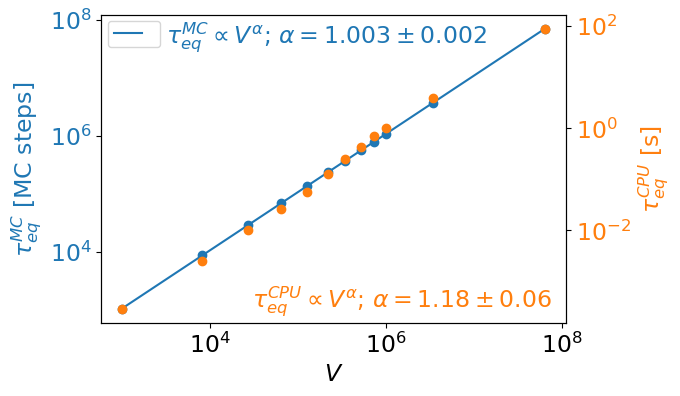

In [22]:
# Perform the power law fit using curve_fit
# Provide an initial guess for the parameters (a, b)
# Based on the plot, a linear approximation might be around tau = 1 * volume, so a=1, b=1 could be a starting point.
# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Plot Tau with error bars
ax.plot(volume, tau, 'o', color='tab:blue')
params, covariance = curve_fit(linear_law, np.log(volume), np.log(tau), absolute_sigma=False)

# Create a range of x values for the fit line
volume_fit = np.linspace(volume.min(), volume.max(), 100)

ax.plot(volume_fit, np.exp(linear_law(np.log(volume_fit), *params)), color='tab:blue', label=r'$\,$')
# Plot the power law fit line
# Set labels for the axes
ax.set_xlabel(r'$V$', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelcolor='tab:blue', labelsize=17)
ax.set_ylabel(r'$\tau_{eq}^{MC}$ [MC steps]', fontsize=17, color='tab:blue')
ax.text(7.5**4, 4*10**7, r'$\tau^{MC}_{eq} \propto V^{\alpha}$; $\alpha = 1.003 \pm 0.002$', color='tab:blue', fontsize=17)
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
# Create a secondary axes that shares the same x-axis
ax2 = ax.twinx()
ax2.plot(volume2, cpu_time, 'o', color='tab:orange')
params_cpu, covariance_cpu = curve_fit(linear_law, np.log(volume2), np.log(cpu_time), absolute_sigma=False)

ax2.set_ylabel(r'$\tau_{eq}^{CPU}$ [s]', color='tab:orange', fontsize=17)
ax2.tick_params(axis='y', labelcolor='tab:orange', labelsize=17)
ax.text(3*10**4, 1.1*10**3, r'$\tau^{CPU}_{eq} \propto V^{\alpha}$; $\alpha = 1.18 \pm 0.06$', color='tab:orange', fontsize=17)
ax2.set_yscale('log')
# Show the plot
plt.savefig('tau_cpu_time_3D_1linear.pdf', dpi=600, bbox_inches='tight')
plt.show()